In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train_value.csv")
label = pd.read_csv("train_label.csv")
data["status_group"] = label["status_group"]

In [3]:
data.shape

(59400, 41)

In [4]:
data.isnull().sum().sort_values(ascending=False)/len(data)

scheme_name              0.474175
scheme_management        0.065269
installer                0.061532
funder                   0.061195
public_meeting           0.056128
permit                   0.051448
subvillage               0.006246
ward                     0.000000
lga                      0.000000
district_code            0.000000
region_code              0.000000
region                   0.000000
num_private              0.000000
basin                    0.000000
wpt_name                 0.000000
latitude                 0.000000
longitude                0.000000
gps_height               0.000000
date_recorded            0.000000
amount_tsh               0.000000
population               0.000000
status_group             0.000000
recorded_by              0.000000
water_quality            0.000000
waterpoint_type          0.000000
source_class             0.000000
source_type              0.000000
source                   0.000000
quantity_group           0.000000
quantity      

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
data.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional


### Response Variable
predict the operating condition of a waterpoint

#### Q> What is a waterpoint ?
waterpoint (ecology) A place (such as a watering hole) where water is available to local wildlife.


In [18]:
data["status_group"].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [75]:
dictonary = {"functional": 2, "non functional": 1, "functional needs repair": 0}
data["status_group"] = data["status_group"].map(dictonary)

#### amount_tsh - Total static head (amount water available to waterpoint)
unit: meter or feet



Static head measures the total vertical distance that a pump raises water. It has two components: static lift and static discharge. Static lift measures the elevation difference between the water source and the pump, while static discharge measures the elevation difference between the discharge point and the pump. Pump head describes pressure in terms of distance, usually in feet or meters. Pressure can be converted between units of distance and units of force per unit area: 2.31 ft of head equals 1 psi (pound per square inch) of pressure.

Subtract the elevation of the water source from the elevation of the center line of the pump to determine static lift.

Subtract the elevation of the center line of the pump from the elevation of the discharge point of the water to determine the static discharge.


Add static lift and static discharge to obtain the total static head.


In [7]:
data["amount_tsh"].describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [11]:
data.groupby("status_group")["amount_tsh"].describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,32259.0,461.798235,3889.735284,0.0,0.0,0.0,50.0,350000.0
functional needs repair,4317.0,267.071577,1925.026420,0.0,0.0,0.0,50.0,100000.0
non functional,22824.0,123.481230,1110.120571,0.0,0.0,0.0,0.0,117000.0


In [18]:
(data["amount_tsh"] == 0).sum()

41639

#### Q> Why we have lots of zero's ?
If the liquid surface of the suction tank is at the same elevation as the discharge end of the pipe then the static head will be zero e.g. well

#### Date Recorded

In [12]:
data["year_recorded"] = data["date_recorded"].apply(lambda date: date.split("-")[0])
data["month_recorded"] = data["date_recorded"].apply(lambda date: date.split("-")[1])
data["day_recorded"] = data["date_recorded"].apply(lambda date: date.split("-")[2])

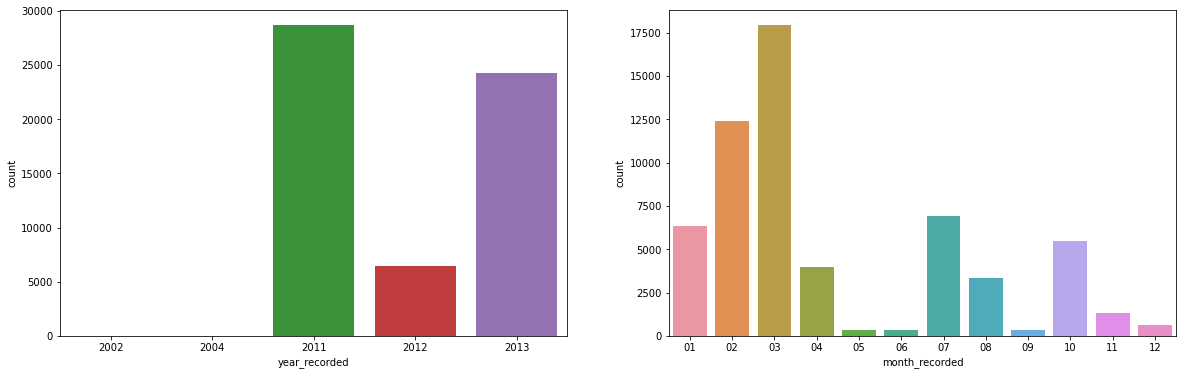

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.countplot(data["year_recorded"], ax=ax[0])
sns.countplot(data["month_recorded"], ax=ax[1])

#### Funder

In [40]:
data["funder"].unique()

array(['Roman', 'Grumeti', 'Lottery Club', ..., 'Dina', 'Brown', 'Samlo'],
      dtype=object)

In [15]:
len(data["funder"].unique())

1898

#### gps_height - Altitude of the well

In [44]:
data["gps_height"].describe()

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

In [16]:
data.groupby("status_group")["gps_height"].describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,32259.0,740.131188,724.193683,-90.0,0.0,550.0,1404.0,2628.0
functional needs repair,4317.0,627.607135,648.397850,-51.0,0.0,385.0,1243.0,2770.0
non functional,22824.0,574.464774,642.752316,-59.0,0.0,293.0,1211.0,2627.0


In [17]:
(data["gps_height"] > 0).sum()

37466

#### Installer

In [50]:
len(data["installer"].unique())

2146

#### Longitude and Latitude

In [54]:
data[["latitude", "longitude"]].iloc[0]

latitude     -9.856322
longitude    34.938093
Name: 0, dtype: float64

#### wpt_name - Name of the waterpoint if there is one

In [56]:
len(data["wpt_name"].unique())

37400

#### basin - Geographic water basin

In [57]:
len(data["basin"].unique())

9

In [60]:
data["basin"].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

#### subvillage - Geographic location

In [64]:
data["subvillage"].unique()

array(['Mnyusi B', 'Nyamara', 'Majengo', ..., 'Itete B', 'Maore Kati',
       'Kikatanyemba'], dtype=object)

In [19]:
len(data["subvillage"].unique())

19288

#### region - Geographic location

In [65]:
data["region"].unique()

array(['Iringa', 'Mara', 'Manyara', 'Mtwara', 'Kagera', 'Tanga',
       'Shinyanga', 'Tabora', 'Pwani', 'Ruvuma', 'Kilimanjaro', 'Rukwa',
       'Mwanza', 'Kigoma', 'Lindi', 'Dodoma', 'Arusha', 'Mbeya',
       'Singida', 'Morogoro', 'Dar es Salaam'], dtype=object)

In [69]:
len(data["region"].unique())

21

#### region code

In [67]:
data["region_code"].unique()

array([11, 20, 21, 90, 18,  4, 17, 14, 60, 10,  3, 15, 19, 16, 80,  1,  6,
        2, 12, 13,  5,  7, 99, 24,  9,  8, 40], dtype=int64)

In [68]:
len(data["region_code"].unique())

27

#### district_code - Geographic location

In [70]:
data["district_code"].unique()

array([ 5,  2,  4, 63,  1,  8,  3,  6, 43,  7, 23, 33, 53, 62, 60, 30, 13,
        0, 80, 67], dtype=int64)

In [72]:
len(data["district_code"].unique())

20

#### lga - Geographic location

A local government area (LGA) is an administrative division of a country that a local government is responsible for. The size of an LGA varies by country but it is generally a subdivision of a state, province, division, or territory. 

In [75]:
len(data["lga"].unique())

125

#### ward - Geographic location

In [77]:
len(data["ward"].unique())

2092

#### population - Population around the well

In [79]:
data["population"].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [82]:
data.groupby("status_group")["population"].describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,32259.0,187.553303,513.198991,0.0,0.0,40.0,200.0,30500.0
functional needs repair,4317.0,175.102154,433.033756,0.0,0.0,25.0,245.0,15300.0
non functional,22824.0,170.016430,413.094978,0.0,0.0,1.0,230.0,9865.0


#### public_meeting - True/False

In [86]:
# data["public_meeting"] = data["public_meeting"].map({"True": 1, "False": 0})

In [88]:
data.groupby("status_group")["public_meeting"].describe()

,count,mean,std,min,25%,50%,75%,max
status_group,,,,,,,,
functional,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functional needs repair,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
non functional,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
data["public_meeting"].isnull().sum()

59400

#### recorded_by - Group entering this row of data

In [92]:
data["recorded_by"].unique()

array(['GeoData Consultants Ltd'], dtype=object)

#### scheme_management - Who operates the waterpoint

In [93]:
data["scheme_management"].unique()

array(['VWC', 'Other', nan, 'Private operator', 'WUG', 'Water Board',
       'WUA', 'Water authority', 'Company', 'Parastatal', 'Trust', 'SWC',
       'None'], dtype=object)

#### scheme_name - Who operates the waterpoint

In [99]:
len(data["scheme_name"].unique())

2697

#### permit - If the waterpoint is permitted

In [100]:
data["permit"].unique()

array([False, True, nan], dtype=object)

In [83]:
df = pd.crosstab(data["permit"], data["status_group"])
df.div(df.sum(axis=1), axis=0)

status_group,0,1,2
permit,,,
False,0.075463,0.407443,0.517094
True,0.069417,0.376145,0.554437


#### extraction_type - The kind of extraction the waterpoint uses

In [102]:
data["extraction_type"].unique()

array(['gravity', 'submersible', 'swn 80', 'nira/tanira', 'india mark ii',
       'other', 'ksb', 'mono', 'windmill', 'afridev', 'other - rope pump',
       'india mark iii', 'other - swn 81', 'other - play pump', 'cemo',
       'climax', 'walimi', 'other - mkulima/shinyanga'], dtype=object)

In [22]:
data["extraction_type"].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [84]:
df = pd.crosstab(data["extraction_type"], data["status_group"])
df.div(df.sum(axis=1), axis=0)

status_group,0,1,2
extraction_type,,,
afridev,0.023729,0.298305,0.677966
cemo,0.100000,0.400000,0.500000
climax,0.000000,0.750000,0.250000
gravity,0.100859,0.299888,0.599253
india mark ii,0.032917,0.363750,0.603333
india mark iii,0.010204,0.540816,0.448980
ksb,0.018375,0.484806,0.496820
mono,0.045026,0.577312,0.377661
nira/tanira,0.078612,0.256561,0.664827


#### extraction_type_group - The kind of extraction the waterpoint uses

In [23]:
data["extraction_type_group"].unique()

array(['gravity', 'submersible', 'swn 80', 'nira/tanira', 'india mark ii',
       'other', 'mono', 'wind-powered', 'afridev', 'rope pump',
       'india mark iii', 'other handpump', 'other motorpump'],
      dtype=object)

In [24]:
data["extraction_type_group"].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

#### extraction_type_class - The kind of extraction the waterpoint uses

In [26]:
data["extraction_type_class"].unique()

array(['gravity', 'submersible', 'handpump', 'other', 'motorpump',
       'wind-powered', 'rope pump'], dtype=object)

In [27]:
data["extraction_type_class"].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

#### management - How the waterpoint is managed

In [28]:
data["management"].unique()

array(['vwc', 'wug', 'other', 'private operator', 'water board', 'wua',
       'company', 'water authority', 'parastatal', 'unknown',
       'other - school', 'trust'], dtype=object)

In [29]:
data["management"].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

#### management_group - How the waterpoint is managed

In [30]:
data["management_group"].unique()

array(['user-group', 'other', 'commercial', 'parastatal', 'unknown'],
      dtype=object)

In [31]:
data["management_group"].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

#### payment - What the water costs

In [32]:
data["payment"].unique()

array(['pay annually', 'never pay', 'pay per bucket', 'unknown',
       'pay when scheme fails', 'other', 'pay monthly'], dtype=object)

In [34]:
data["payment"].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

#### payment_type - What the water costs

In [35]:
data["payment_type"].unique()

array(['annually', 'never pay', 'per bucket', 'unknown', 'on failure',
       'other', 'monthly'], dtype=object)

In [36]:
data["payment_type"].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

#### water_quality - The quality of the water

In [37]:
data["water_quality"].unique()

array(['soft', 'salty', 'milky', 'unknown', 'fluoride', 'coloured',
       'salty abandoned', 'fluoride abandoned'], dtype=object)

In [38]:
data["water_quality"].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

#### quality_group - The quality of the water

In [39]:
data["quality_group"].unique()

array(['good', 'salty', 'milky', 'unknown', 'fluoride', 'colored'],
      dtype=object)

In [40]:
data["quality_group"].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

#### quantity - The quantity of water

In [41]:
data["quantity"].unique()

array(['enough', 'insufficient', 'dry', 'seasonal', 'unknown'],
      dtype=object)

In [42]:
data["quantity"].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

#### quantity_group - The quantity of water

In [43]:
data["quantity_group"].unique()

array(['enough', 'insufficient', 'dry', 'seasonal', 'unknown'],
      dtype=object)

In [44]:
data["quantity_group"].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

#### source - The source of the water

In [45]:
data["source"].unique()

array(['spring', 'rainwater harvesting', 'dam', 'machine dbh', 'other',
       'shallow well', 'river', 'hand dtw', 'lake', 'unknown'],
      dtype=object)

In [46]:
data["source"].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

#### source_type - The source of the water

In [47]:
data["source_type"].unique()

array(['spring', 'rainwater harvesting', 'dam', 'borehole', 'other',
       'shallow well', 'river/lake'], dtype=object)

In [48]:
data["source_type"].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [76]:
data.groupby("source_type")["status_group"].mean()

source_type
borehole                1.452841
dam                     1.349085
other                   1.550360
rainwater harvesting    1.467102
river/lake              1.423436
shallow well            1.437886
spring                  1.547324
Name: status_group, dtype: float64

#### source_class - The source of the water

In [49]:
data["source_class"].unique()

array(['groundwater', 'surface', 'unknown'], dtype=object)

In [50]:
data["source_class"].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [68]:
pd.crosstab(data["source_class"], data["status_group"])

status_group,functional,functional needs repair,non functional
source_class,,,
groundwater,24835,2741,18218
surface,7266,1571,4491
unknown,158,5,115


In [77]:
data.groupby("source_class")["status_group"].mean()

source_class
groundwater    1.482465
surface        1.427296
unknown        1.550360
Name: status_group, dtype: float64

#### waterpoint_type - The kind of waterpoint

In [51]:
data["waterpoint_type"].unique()

array(['communal standpipe', 'communal standpipe multiple', 'hand pump',
       'other', 'improved spring', 'cattle trough', 'dam'], dtype=object)

In [52]:
data["waterpoint_type"].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [67]:
pd.crosstab(data["waterpoint_type"], data["status_group"])

status_group,functional,functional needs repair,non functional
waterpoint_type,,,
cattle trough,84,2,30
communal standpipe,17726,2260,8536
communal standpipe multiple,2235,648,3220
dam,6,0,1
hand pump,10805,1029,5654
improved spring,563,85,136
other,840,293,5247


#### waterpoint_type_group - The kind of waterpoint

In [53]:
data["waterpoint_type_group"].unique()

array(['communal standpipe', 'hand pump', 'other', 'improved spring',
       'cattle trough', 'dam'], dtype=object)

In [54]:
data["waterpoint_type_group"].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64